# Motivation: Usage of Electrical appliances with cooling demands anticipated increase in total energy usage, which have a direct impact on the environment through its footprint (pollution, public health, climate change). To reduce the footprint, we first need to identify the dominant factors controlling the total energy usage, which could then be optimized to reduce the foot print. Specifically, we are trying to explore if total energy consumption has any co-relationship with weather data, so that I could be modeled. 


## //**** Prediction model for Total Energy Consumption  ## 


In [742]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt #module for plotting
import datetime as dt # module for manipulating dates and times
import matplotlib

In [743]:
## //** Loading The Data **//

Energy_Data=pd.read_csv("data.csv",parse_dates=["date"],index_col="date")### 10-min observations of Energy consumption
                                              ### and in-house and ambient variables (T,RH,U,Visilibity)
                                              ### Indexing Timestamp
Energy_Data_NDI=pd.read_csv("data.csv")# NDI: No Date Index
##Energy_Data_NDI.date.dt.dayofweek ## Finding the day of the week

In [744]:
#### //** Smoothing:Calculating the Averaging of the Data at HOURLY/DAILY/WEEKLY AND MONTHLY TIME SCALES ** //

Energy_Data_Hourly=Energy_Data.resample('H').mean()
Energy_Data_Daily=Energy_Data.resample('D').mean()
Energy_Data_Weekly=Energy_Data.resample('W').mean()
Energy_Data_Monthly=Energy_Data.resample('M').mean()

In [745]:
#### Specific Humidity Calculation [Output in g/kg]####

#Energy_Data_Daily_Press_in_mb=Energy_Data_Daily.Press_mm_hg/0.75006157584566 ## Converting mm in hg to mbar

def specific_humidity1(Temp,RH,P):
    P=P/0.75006157584566;## Converting mm in hg to mbar
    return RH*(0.622*6.112*np.exp((17.67*Temp)/(Temp+243.5)))/(P*100)*1000 ## Specific humidity in g/kg

def specific_humidity2(Temp,RH,P):
    P=P/0.75006157584566;## Converting mm in hg to mbar
    return  RH*(np.exp((17.67*Temp)/(Temp+273.15-29.65)))/(0.263*P*100)*1000
                        
    #esat=(6.112*np.exp((17.67.*Temp)./(Temp+243.5)) ## Saturation Vapor Pressure in mb
    #wsat=0.622*esat/P 
    #spec_humidity=RH/100*wsat ## mixing ratio in kg/kg   
      #specific_humidity=(RH*0.622*(6.112*np.exp((17.67*Temp)/(Temp+243.5)))/(P*100)
             
print (specific_humidity1(20,40,733),specific_humidity2(20,40,733))

(5.949660783384644, 5.950626974785286)


In [746]:
Energy_Data_Daily.describe()

,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,R5,...,H_7,R8,H_8,R9,H_9,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,...,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,101.893822,21.686943,40.304331,20.347268,40.448149,22.265185,39.279910,20.854813,39.077411,19.589144,...,35.442465,22.015805,42.980415,19.478673,41.578885,7.422170,755.418617,79.789718,4.046721,38.358297
std,31.784882,1.474836,3.654426,1.822969,3.354169,1.944001,3.112210,1.958590,4.186637,1.780676,...,4.685931,1.859937,4.474284,2.020102,3.668733,4.635621,7.299708,9.033347,1.951432,4.661956
min,37.500000,17.474103,33.062564,16.730961,31.072535,17.582789,33.087534,15.356111,31.976834,15.480710,...,26.007679,17.362951,35.503432,15.097216,33.983455,-2.937847,735.173810,50.468750,1.000000,29.576389
25%,80.364583,20.863390,37.443014,19.125511,38.155456,20.930693,36.890080,19.607582,35.519557,18.313160,...,31.592763,20.913630,39.757817,18.039213,38.638456,4.078646,751.161458,74.563368,2.660590,35.358507
50%,96.840278,21.640911,39.672688,19.925179,40.269598,22.078334,38.630761,20.548145,38.486189,19.364421,...,34.965332,22.269444,41.775613,19.436227,40.752954,7.039340,755.890567,80.277778,3.637153,37.883681
75%,114.600694,22.341837,43.064447,21.304803,42.716609,23.214398,41.375972,21.889250,42.448147,20.588678,...,38.980558,23.246459,46.733624,20.614062,44.253089,9.860260,760.853385,86.014757,4.922743,40.735491
max,192.291667,25.418640,51.643959,25.294910,51.016055,27.348456,46.173738,25.489118,49.107610,24.251053,...,47.243391,26.043056,53.868854,24.169420,50.883542,19.375000,770.546528,97.069444,10.631944,58.600694


In [747]:
########## Statistics of Daily Total Energy Consumption and Weather Data ##########
Energy_Data_Hourly.describe()

,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,R5,...,H_7,R8,H_8,R9,H_9,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility
count,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,...,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000
mean,101.582573,21.687537,40.261345,20.342466,40.421067,22.268765,39.242985,20.856309,39.028661,19.593020,...,35.390395,22.029792,42.937888,19.486769,41.553741,7.416325,755.522520,79.744656,4.039742,38.327964
std,83.286942,1.605960,3.942554,2.189660,4.053682,2.005313,3.244749,2.040943,4.336904,1.840764,...,5.110314,1.955488,5.216124,2.014819,4.143581,5.316884,7.398575,14.830042,2.430863,11.212175
min,28.333333,16.790000,27.509167,16.100000,21.010000,17.245000,29.700556,15.100000,28.715571,15.347500,...,23.340278,16.364074,29.738611,14.890000,29.218889,-4.961667,729.383333,25.250000,0.416667,1.000000
25%,51.666667,20.746250,37.355000,18.828472,37.914135,20.790000,36.887778,19.545799,35.520278,18.263435,...,31.505762,20.786250,39.117869,18.022222,38.520694,3.666667,750.916667,70.416667,2.000000,31.833333
50%,66.666667,21.600000,39.655694,19.995556,40.495556,22.100000,38.540000,20.650556,38.412159,19.390000,...,34.920952,22.144361,42.355278,19.390000,40.861667,6.916667,756.100000,83.666667,3.583333,40.000000
75%,118.333333,22.633333,43.086181,21.506771,43.263750,23.308403,41.757083,22.100000,42.175556,20.629043,...,39.023102,23.378889,46.558681,20.600000,44.352024,10.416667,760.931250,91.583333,5.416667,40.000000
max,623.333333,26.203333,53.980139,29.727778,53.914975,28.975286,49.472222,26.144762,50.747222,25.506389,...,51.191296,27.187778,58.707315,24.500000,53.140000,25.933333,772.258333,100.000000,13.000000,66.000000


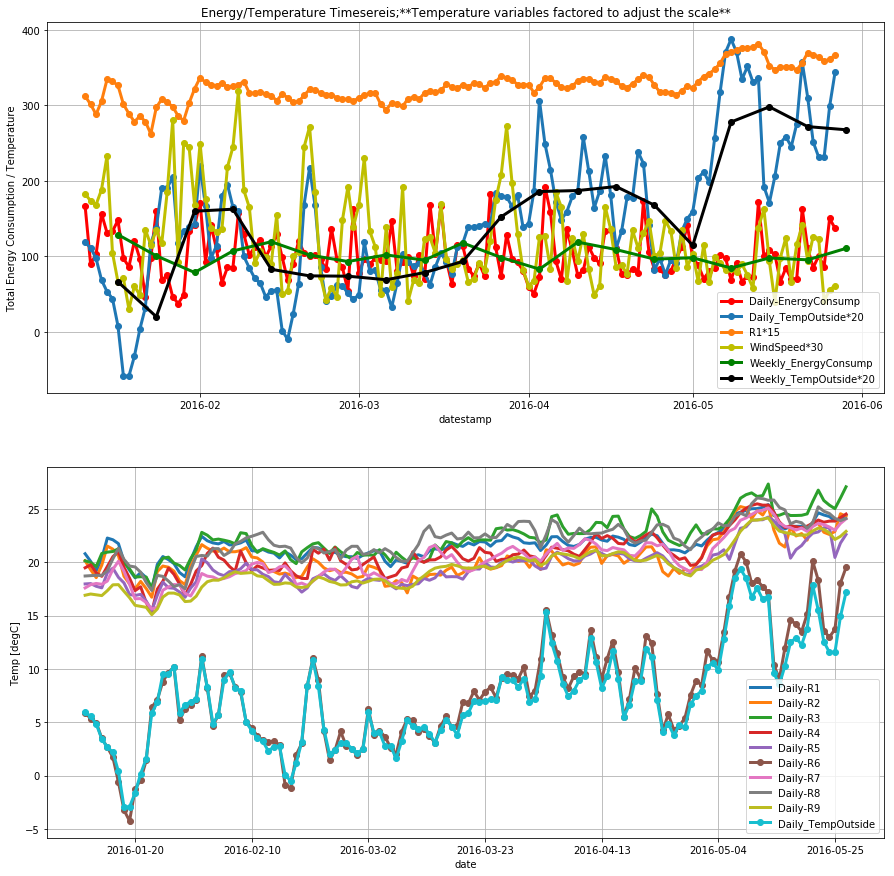

In [748]:
##//** Plotting the timeseries at different time scales **// ##
#### // ** to assess the periocities and co-variability of Energy and Weather Data **//


%matplotlib inline

fig = plt.figure(figsize=(15,15))
xax = np.linspace(0,27,28)

ax1 = fig.add_subplot(211)
ax1.plot(Energy_Data_Daily.index, Energy_Data_Daily["TotalConsmp"], 'r-o',linewidth=3.0,label='Daily-EnergyConsump')
ax1.plot(Energy_Data_Daily.index, Energy_Data_Daily["TempOutSide"]*20,'-o',linewidth=3.0,label='Daily_TempOutside*20')
ax1.plot(Energy_Data_Daily.index, Energy_Data_Daily["R1"]*15,'-o',linewidth=3.0,label='R1*15')
ax1.plot(Energy_Data_Daily.index, Energy_Data_Daily["Windspeed"]*30,'y-o',linewidth=3.0,label='WindSpeed*30')


ax1.plot(Energy_Data_Weekly.index, Energy_Data_Weekly["TotalConsmp"], 'g-o',linewidth=3.0,label='Weekly_EnergyConsump')
ax1.plot(Energy_Data_Weekly.index, Energy_Data_Weekly["TempOutSide"]*20, 'k-o',linewidth=3.0,label='Weekly_TempOutside*20')



plt.xlabel('datestamp')
plt.ylabel('Total Energy Consumption / Temperature')
plt.title('Energy/Temperature Timesereis;**Temperature variables factored to adjust the scale**')
plt.grid(True)
plt.legend()


ax1 = fig.add_subplot(212)
ax1.plot(Energy_Data_Daily.index, Energy_Data_Daily["R1"], '-',linewidth=3.0,label='Daily-R1')
ax1.plot(Energy_Data_Daily.index, Energy_Data_Daily["R2"], '-',linewidth=3.0,label='Daily-R2')
ax1.plot(Energy_Data_Daily.index, Energy_Data_Daily["R3"], '-',linewidth=3.0,label='Daily-R3')
ax1.plot(Energy_Data_Daily.index, Energy_Data_Daily["R4"], '-',linewidth=3.0,label='Daily-R4')
ax1.plot(Energy_Data_Daily.index, Energy_Data_Daily["R5"], '-',linewidth=3.0,label='Daily-R5')
ax1.plot(Energy_Data_Daily.index, Energy_Data_Daily["R6"], '-o',linewidth=3.0,label='Daily-R6')
ax1.plot(Energy_Data_Daily.index, Energy_Data_Daily["R7"], '-',linewidth=3.0,label='Daily-R7')
ax1.plot(Energy_Data_Daily.index, Energy_Data_Daily["R8"], '-',linewidth=3.0,label='Daily-R8')
ax1.plot(Energy_Data_Daily.index, Energy_Data_Daily["R9"], '-',linewidth=3.0,label='Daily-R9')
ax1.plot(Energy_Data_Daily.index, Energy_Data_Daily["TempOutSide"], '-o',linewidth=3.0,label='Daily_TempOutside')
plt.xlabel('date')
plt.ylabel('Temp [degC]')
plt.grid(True)
plt.legend()
fig.savefig('Diurnal_Variation_Energy_Weather.png')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a529cde10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a5d6aedd0>]], dtype=object)

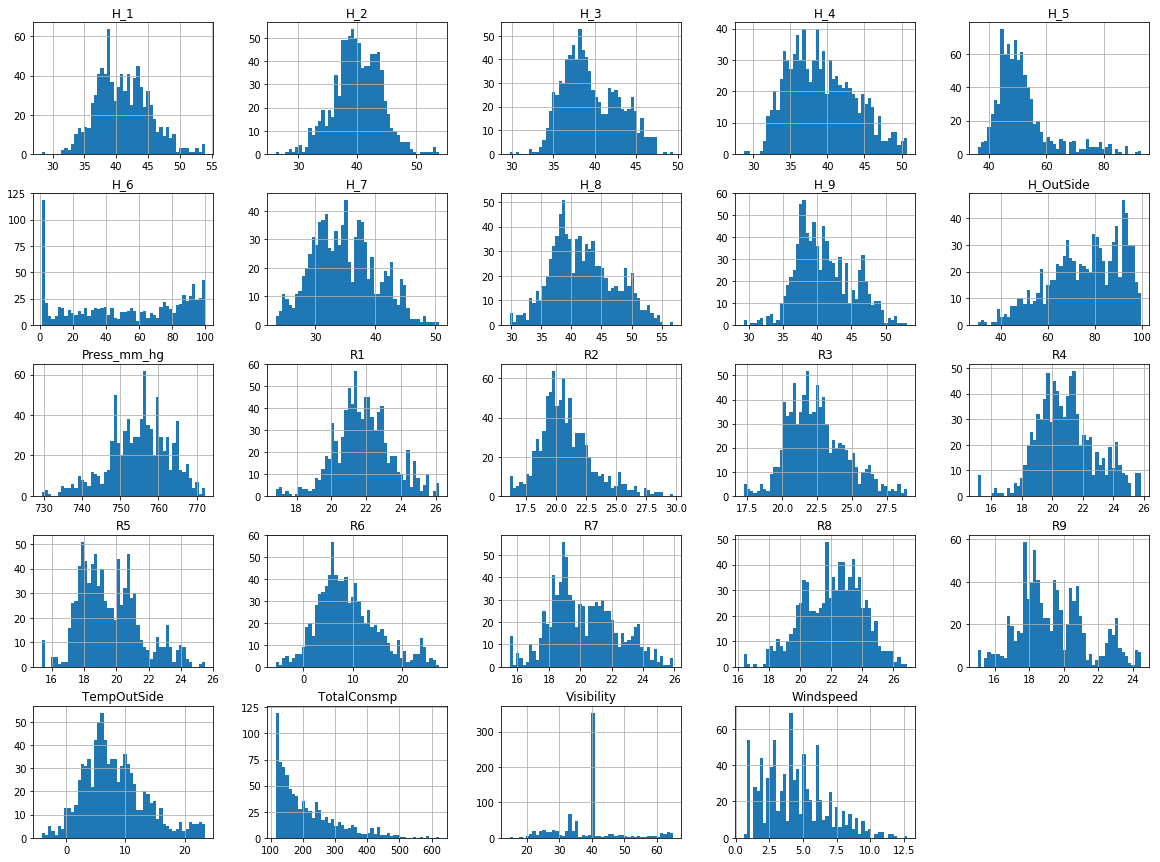

In [749]:
##//** Plotting the PDF (probability density functions) of Energy Consumption and Weather Data **// ##
#### // ** to assess the distributions of the data (Gaussian/Non-Gaussian/??) **//
## Hourly Data ##
Energy_Data_Hourly.where(Energy_Data_Hourly.TotalConsmp>114).hist(bins=50,figsize=(20,15))

In [750]:
##//** Plotting the PDF (probability density functions) of Energy Consumption and Weather Data **// ##
#### // ** **//
## Daily Data ##
#Energy_Data_Daily.hist(bins=50,figsize=(20,15))

## PRE-PROCESSING: FEATURE EXTRACTIon and FEATURE ENGINEERING ##

##  IMPORTANT OBSERVATIONS FROM THE ABOVE FIGURES 
-Total Energy Consumption seems to have largest variability at Daily timescales and has no long-term trend. There is a scope to model the Energy consumption with time
-The periods with higher Total Energy Consumption tends to associate with the OUTSIDE TEMPERATURE extremes at daily time scales 
-The in-house conditions are strongly associated (includng the trend) with the outside Temperatures. 
-The temperature in Room #6 close to outside temperature-suggesting that this room is ventilated.
-The ENERGY CONSUMPTION DISTRIBUTION have longer tails (Positively Skewed) at shorter time scale (hourly), and it gets shortened for longer time scales.

In [751]:
####### DAILY FEATURE CORRELATION MATRIX ########
####### To identity the the "independent" features with higher association with the Total Energy Consumption 
Energy_Data_Daily.corr()

,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,R5,...,H_7,R8,H_8,R9,H_9,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility
TotalConsmp,1.000000,0.093778,0.171081,0.084333,0.125195,0.153391,0.173481,0.008026,0.151026,0.027483,...,0.107336,0.049991,0.162662,-0.034916,0.166563,-0.023094,-0.139022,0.105602,0.146559,0.008128
R1,0.093778,1.000000,0.203295,0.924478,0.082260,0.950868,-0.040029,0.930756,0.097322,0.940712,...,0.204399,0.860810,0.066321,0.919898,0.162082,0.784930,-0.158339,-0.455711,-0.128389,-0.212584
H_1,0.171081,0.203295,1.000000,0.349826,0.907554,0.267913,0.899763,0.122444,0.940308,0.230620,...,0.897100,-0.039867,0.888979,0.117313,0.898914,0.425529,-0.333837,0.398434,0.301383,-0.074601
R2,0.084333,0.924478,0.349826,1.000000,0.096119,0.870459,0.172553,0.853092,0.278502,0.853384,...,0.395816,0.685495,0.272996,0.799944,0.344987,0.839484,-0.161592,-0.454818,-0.056548,-0.193163
H_2,0.125195,0.082260,0.907554,0.096119,1.000000,0.179041,0.764431,0.013221,0.831401,0.148672,...,0.752868,-0.041382,0.740290,0.072907,0.760581,0.285107,-0.312233,0.520191,0.274641,-0.056936
R3,0.153391,0.950868,0.267913,0.870459,0.179041,1.000000,-0.042595,0.908643,0.119295,0.941458,...,0.207028,0.852006,0.072167,0.936426,0.159314,0.818436,-0.182857,-0.432639,-0.141722,-0.252073
H_3,0.173481,-0.040029,0.899763,0.172553,0.764431,-0.042595,1.000000,-0.154573,0.944058,-0.065296,...,0.890360,-0.333893,0.930298,-0.213545,0.924410,0.174684,-0.265452,0.480833,0.394702,0.013525
R4,0.008026,0.930756,0.122444,0.853092,0.013221,0.908643,-0.154573,1.000000,-0.052721,0.921382,...,0.080783,0.846452,-0.063044,0.929673,0.017685,0.739937,-0.076907,-0.532038,-0.258092,-0.246305
H_4,0.151026,0.097322,0.940308,0.278502,0.831401,0.119295,0.944058,-0.052721,1.000000,0.083329,...,0.939006,-0.194081,0.945051,-0.055502,0.944346,0.347432,-0.273660,0.459852,0.411005,0.003932
R5,0.027483,0.940712,0.230620,0.853384,0.148672,0.941458,-0.065296,0.921382,0.083329,1.000000,...,0.171100,0.872944,0.026583,0.949265,0.114716,0.766336,-0.172387,-0.440956,-0.179459,-0.232530


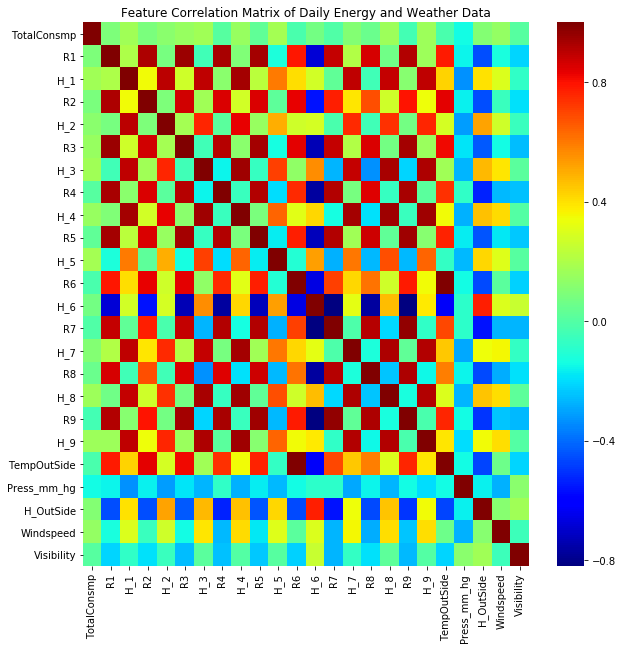

In [752]:
### Graphical Representaiton of Feature Correlation Matrix ###
import seaborn as sns
fig = plt.figure(figsize=(10,10))
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
sns.heatmap(Energy_Data_Daily.corr(),cmap="jet") 
plt.title('Feature Correlation Matrix of Daily Energy and Weather Data')
fig.savefig('Feature_Correlation_Matrix.png')

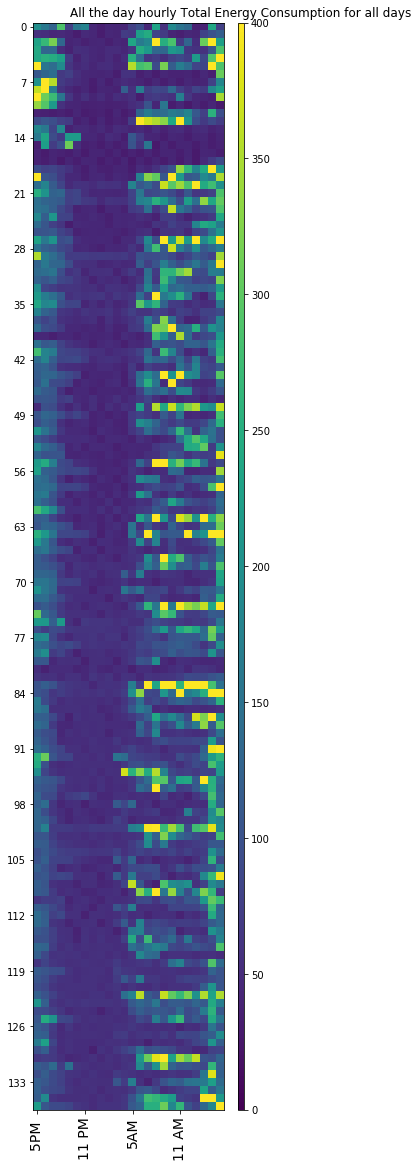

In [753]:
### DECOMPOSITNG THE TOTAL ENERGY CONSUMPTION for TIME (DAY/NIGHT) of the DAY and WEEKLY  ####
### To identify patterns at these time scales ###

from mpl_toolkits.axes_grid1 import make_axes_locatable

Total_Energy_Hourly = Energy_Data_Hourly["TotalConsmp"].values
Total_Energy_Hourly = Total_Energy_Hourly[2:].reshape(137,24)

s2 = ['5PM ', '11 PM', '5AM', '11 AM']
s2 = np.tile(s2, 1)
xTickLabels = s2
fig = plt.figure(figsize=(5,20))
ax = plt.gca()
im = ax.imshow(Total_Energy_Hourly, vmin =0, vmax = 400, interpolation='nearest', origin='upper')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
ax.set_yticks(range(0,137,7))
plt.title('All the day hourly Total Energy Consumption for all days')
plt.ylabel('Days since 2015-01-11')
ax.set_xticks(range(0,24,6))
ax.set_xticklabels(labels = xTickLabels, fontsize = 14, rotation = 90)
plt.colorbar(im, cax=cax)
fig.savefig('Diurnal_Energy_Consumption.png')

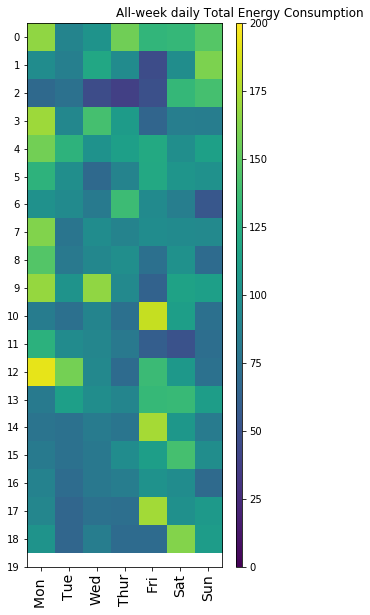

In [754]:
### DECOMPOSITNG THE TOTAL ENERGY CONSUMPTION DAY OF THE WEEK ####
Total_Energy_Daily = Energy_Data_Daily["TotalConsmp"].values
Total_Energy_Daily=Total_Energy_Daily[:133].reshape(19,7)

s2 = ['Mon ', 'Tue', 'Wed', 'Thur','Fri','Sat','Sun']
xTickLabels = s2
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
im = ax.imshow(Total_Energy_Daily, vmin =0, vmax = 200, interpolation='nearest', origin='upper')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
ax.set_xticks(range(0,7,1))
ax.set_xticklabels(labels = xTickLabels, fontsize = 14, rotation = 90)
ax.set_yticks(range(0,20,1))
plt.title('All-week daily Total Energy Consumption')

plt.colorbar(im, cax=cax)
fig.savefig('Weekly_Energy_Consumption.png')

IMPORTANT OBSERVATIONS
- Energy Consumption is Maximum during Daytime (between 5AM to 6 PM) compared to Night time

-Mondays, Friday and Saturday Seems to have higher daily energy consumption respectively
-Variance in Energy Consumption is larger at diurnal timescale compared to daily and weekly 



In [755]:
#### MAY BE SPECIFIC HUMIDITY WOULD BE a BETTER INDEPENDENT PREDICTOR?? ####
#### As it inherently related to T,RH and P ####

Energy_Data_Daily_SH1=specific_humidity1(Energy_Data_Daily.R1,Energy_Data_Daily.H_1,Energy_Data_Daily.Press_mm_hg)
Energy_Data_Daily_SH2=specific_humidity1(Energy_Data_Daily.R2,Energy_Data_Daily.H_2,Energy_Data_Daily.Press_mm_hg)
Energy_Data_Daily_SH3=specific_humidity1(Energy_Data_Daily.R3,Energy_Data_Daily.H_3,Energy_Data_Daily.Press_mm_hg)
Energy_Data_Daily_SH4=specific_humidity1(Energy_Data_Daily.R4,Energy_Data_Daily.H_4,Energy_Data_Daily.Press_mm_hg)
Energy_Data_Daily_SH5=specific_humidity1(Energy_Data_Daily.R5,Energy_Data_Daily.H_5,Energy_Data_Daily.Press_mm_hg)
Energy_Data_Daily_SH7=specific_humidity1(Energy_Data_Daily.R7,Energy_Data_Daily.H_7,Energy_Data_Daily.Press_mm_hg)
Energy_Data_Daily_SH8=specific_humidity1(Energy_Data_Daily.R8,Energy_Data_Daily.H_8,Energy_Data_Daily.Press_mm_hg)
Energy_Data_Daily_SH9=specific_humidity1(Energy_Data_Daily.R9,Energy_Data_Daily.H_9,Energy_Data_Daily.Press_mm_hg)


Energy_Data_Hourly_SH1=specific_humidity1(Energy_Data_Hourly.R1,Energy_Data_Hourly.H_1,Energy_Data_Hourly.Press_mm_hg)
Energy_Data_Hourly_SH2=specific_humidity1(Energy_Data_Hourly.R2,Energy_Data_Hourly.H_2,Energy_Data_Hourly.Press_mm_hg)
Energy_Data_Hourly_SH3=specific_humidity1(Energy_Data_Hourly.R3,Energy_Data_Hourly.H_3,Energy_Data_Hourly.Press_mm_hg)
Energy_Data_Hourly_SH4=specific_humidity1(Energy_Data_Hourly.R4,Energy_Data_Hourly.H_4,Energy_Data_Hourly.Press_mm_hg)
Energy_Data_Hourly_SH5=specific_humidity1(Energy_Data_Hourly.R5,Energy_Data_Hourly.H_5,Energy_Data_Hourly.Press_mm_hg)
Energy_Data_Hourly_SH7=specific_humidity1(Energy_Data_Hourly.R7,Energy_Data_Hourly.H_7,Energy_Data_Hourly.Press_mm_hg)
Energy_Data_Hourly_SH8=specific_humidity1(Energy_Data_Hourly.R8,Energy_Data_Hourly.H_8,Energy_Data_Hourly.Press_mm_hg)
Energy_Data_Hourly_SH9=specific_humidity1(Energy_Data_Hourly.R9,Energy_Data_Hourly.H_9,Energy_Data_Hourly.Press_mm_hg)

Energy_Data_Daily_SH_Added = pd.concat([Energy_Data_Daily.TotalConsmp, Energy_Data_Daily_SH1, Energy_Data_Daily_SH2, Energy_Data_Daily_SH3, Energy_Data_Daily_SH4, Energy_Data_Daily_SH5, Energy_Data_Daily_SH7, Energy_Data_Daily_SH8, Energy_Data_Daily_SH9,Energy_Data_Daily.TempOutSide,Energy_Data_Daily.Windspeed],axis=1,join_axes=[Energy_Data_Daily.index])

Energy_Data_Hourly_SH_Added = pd.concat([Energy_Data_Hourly.TotalConsmp, Energy_Data_Hourly_SH1, Energy_Data_Hourly_SH2, Energy_Data_Hourly_SH3, Energy_Data_Hourly_SH4, Energy_Data_Hourly_SH5, Energy_Data_Hourly_SH7, Energy_Data_Hourly_SH8, Energy_Data_Hourly_SH9,Energy_Data_Hourly.TempOutSide,Energy_Data_Hourly.Windspeed],axis=1,join_axes=[Energy_Data_Hourly.index])

Energy_Data_Daily_SH_Added.corr()

,TotalConsmp,0,1,2,3,4,5,6,7,TempOutSide,Windspeed
TotalConsmp,1.000000,0.170202,0.139723,0.223658,0.109330,0.146225,0.070902,0.159687,0.068695,-0.023094,0.146559
0,0.170202,1.000000,0.996342,0.983102,0.979613,0.872952,0.936561,0.933099,0.954280,0.763172,0.102667
1,0.139723,0.996342,1.000000,0.979119,0.980966,0.862498,0.943524,0.926406,0.954226,0.786728,0.104130
2,0.223658,0.983102,0.979119,1.000000,0.963176,0.862603,0.924944,0.919103,0.947048,0.781635,0.089771
3,0.109330,0.979613,0.980966,0.963176,1.000000,0.866529,0.944713,0.910805,0.950237,0.794755,0.062888
4,0.146225,0.872952,0.862498,0.862603,0.866529,1.000000,0.835180,0.869580,0.848955,0.600221,0.069501
5,0.070902,0.936561,0.943524,0.924944,0.944713,0.835180,1.000000,0.887767,0.945110,0.807836,0.031801
6,0.159687,0.933099,0.926406,0.919103,0.910805,0.869580,0.887767,1.000000,0.912180,0.719275,0.066105
7,0.068695,0.954280,0.954226,0.947048,0.950237,0.848955,0.945110,0.912180,1.000000,0.837262,0.018430
TempOutSide,-0.023094,0.763172,0.786728,0.781635,0.794755,0.600221,0.807836,0.719275,0.837262,1.000000,0.057490


In [756]:
#### TRYING TO EXPLORE IF the "Temperature Difference" instead of "Absolute Temperature" between In-room and OUTSIDE 
#### have higher association with the Energy Consumption !!

R1_Diff_Hourly=Energy_Data_Hourly["R1"]-Energy_Data_Hourly["TempOutSide"]
R2_Diff_Hourly=Energy_Data_Hourly["R2"]-Energy_Data_Hourly["TempOutSide"]
R3_Diff_Hourly=Energy_Data_Hourly["R3"]-Energy_Data_Hourly["TempOutSide"]
R4_Diff_Hourly=Energy_Data_Hourly["R4"]-Energy_Data_Hourly["TempOutSide"]
R5_Diff_Hourly=Energy_Data_Hourly["R5"]-Energy_Data_Hourly["TempOutSide"]
R7_Diff_Hourly=Energy_Data_Hourly["R7"]-Energy_Data_Hourly["TempOutSide"]
R8_Diff_Hourly=Energy_Data_Hourly["R8"]-Energy_Data_Hourly["TempOutSide"]
R9_Diff_Hourly=Energy_Data_Hourly["R9"]-Energy_Data_Hourly["TempOutSide"]

R1_Diff_Daily=Energy_Data_Daily["R1"]-Energy_Data_Daily["TempOutSide"]
R2_Diff_Daily=Energy_Data_Daily["R2"]-Energy_Data_Daily["TempOutSide"]
R3_Diff_Daily=Energy_Data_Daily["R3"]-Energy_Data_Daily["TempOutSide"]
R4_Diff_Daily=Energy_Data_Daily["R4"]-Energy_Data_Daily["TempOutSide"]
R5_Diff_Daily=Energy_Data_Daily["R5"]-Energy_Data_Daily["TempOutSide"]
R7_Diff_Daily=Energy_Data_Daily["R7"]-Energy_Data_Daily["TempOutSide"]
R8_Diff_Daily=Energy_Data_Daily["R8"]-Energy_Data_Daily["TempOutSide"]
R9_Diff_Daily=Energy_Data_Daily["R9"]-Energy_Data_Daily["TempOutSide"]

RDiff_Hourly = pd.concat([Energy_Data_Hourly.TotalConsmp, R1_Diff_Hourly,R2_Diff_Hourly,R3_Diff_Hourly,R4_Diff_Hourly,R5_Diff_Hourly,R7_Diff_Hourly,R8_Diff_Hourly,R9_Diff_Hourly,Energy_Data_Hourly.TempOutSide,Energy_Data_Hourly.Windspeed],axis=1,join_axes=[Energy_Data_Hourly.index])
RDiff_Daily = pd.concat([Energy_Data_Daily.TotalConsmp, R1_Diff_Daily,R2_Diff_Daily,R3_Diff_Daily,R4_Diff_Daily,R5_Diff_Daily,R7_Diff_Daily,R8_Diff_Daily,R9_Diff_Daily,Energy_Data_Daily.TempOutSide,Energy_Data_Daily.Windspeed],axis=1,join_axes=[Energy_Data_Daily.index])


RDiff_Daily.corr()

,TotalConsmp,0,1,2,3,4,5,6,7,TempOutSide,Windspeed
TotalConsmp,1.000000,0.068231,0.080011,0.124959,0.035607,0.045015,0.026305,0.052074,0.010833,-0.023094,0.146559
0,0.068231,1.000000,0.982339,0.983826,0.975315,0.984438,0.960010,0.969169,0.970136,-0.967175,-0.126767
1,0.080011,0.982339,1.000000,0.955890,0.954092,0.959660,0.926231,0.928298,0.931754,-0.952701,-0.113391
2,0.124959,0.983826,0.955890,1.000000,0.970762,0.982979,0.963427,0.971129,0.977651,-0.938809,-0.167132
3,0.035607,0.975315,0.954092,0.970762,1.000000,0.975740,0.972765,0.963241,0.976153,-0.924120,-0.223896
4,0.045015,0.984438,0.959660,0.982979,0.975740,1.000000,0.971046,0.973463,0.982303,-0.943938,-0.169123
5,0.026305,0.960010,0.926231,0.963427,0.972765,0.971046,1.000000,0.977716,0.988377,-0.906407,-0.235776
6,0.052074,0.969169,0.928298,0.971129,0.963241,0.973463,0.977716,1.000000,0.985352,-0.920580,-0.205173
7,0.010833,0.970136,0.931754,0.977651,0.976153,0.982303,0.988377,0.985352,1.000000,-0.920587,-0.222668
TempOutSide,-0.023094,-0.967175,-0.952701,-0.938809,-0.924120,-0.943938,-0.906407,-0.920580,-0.920587,1.000000,0.057490


In [757]:
Energy_Data_Daily_SH_Added.where(Energy_Data_Daily.TotalConsmp>118).corr()#### Only for Energy Consumption Values > 75th percentile (114 wh)

,TotalConsmp,0,1,2,3,4,5,6,7,TempOutSide,Windspeed
TotalConsmp,1.000000,0.276608,0.274917,0.305961,0.273917,0.244680,0.272319,0.248110,0.262825,0.385268,0.089546
0,0.276608,1.000000,0.997471,0.978164,0.980541,0.886120,0.932855,0.942048,0.937884,0.866111,0.153708
1,0.274917,0.997471,1.000000,0.974565,0.982228,0.888183,0.935163,0.941270,0.941460,0.876747,0.147257
2,0.305961,0.978164,0.974565,1.000000,0.961944,0.877209,0.921665,0.946166,0.945406,0.908456,0.131159
3,0.273917,0.980541,0.982228,0.961944,1.000000,0.910275,0.937353,0.915243,0.923245,0.850633,0.102534
4,0.244680,0.886120,0.888183,0.877209,0.910275,1.000000,0.866169,0.865188,0.850405,0.742248,0.059523
5,0.272319,0.932855,0.935163,0.921665,0.937353,0.866169,1.000000,0.887109,0.939876,0.864290,-0.000300
6,0.248110,0.942048,0.941270,0.946166,0.915243,0.865188,0.887109,1.000000,0.921452,0.849294,0.125627
7,0.262825,0.937884,0.941460,0.945406,0.923245,0.850405,0.939876,0.921452,1.000000,0.921631,0.044347
TempOutSide,0.385268,0.866111,0.876747,0.908456,0.850633,0.742248,0.864290,0.849294,0.921631,1.000000,0.067330


Text(0.5,1,u'Correlation Matrix for Energy Consumption>114 Wh [Numbers represent Specific humidity]')

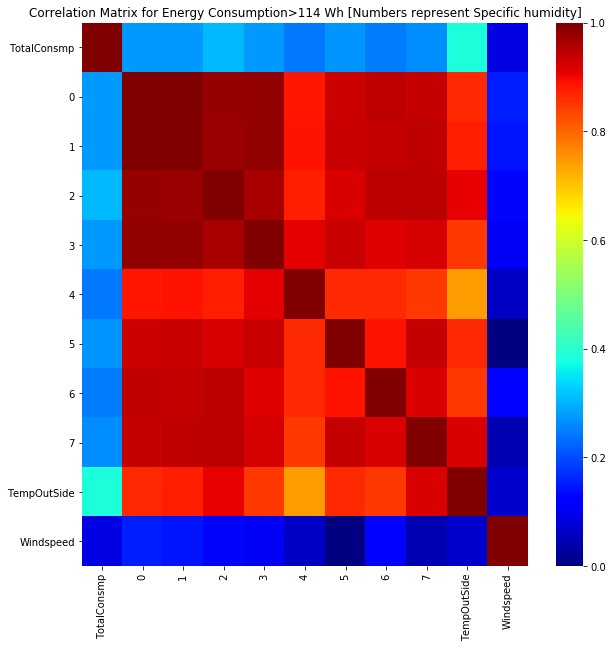

In [758]:
### Feature Correlation Matrix for cases when Daily Energy Consumption>  114 Wh (75 th percentile)###
import seaborn as sns
fig = plt.figure(figsize=(10,10))
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
sns.heatmap(Energy_Data_Daily_SH_Added.where(Energy_Data_Daily.TotalConsmp>118).corr(),cmap="jet") 
plt.title('Correlation Matrix for Energy Consumption>114 Wh [Numbers represent Specific humidity]')

In [759]:
RDiff_Daily.where(Energy_Data_Daily.TotalConsmp>118).corr() #### Only for Energy Consumption Values > 75th percentile (114 wh)

,TotalConsmp,0,1,2,3,4,5,6,7,TempOutSide,Windspeed
TotalConsmp,1.000000,-0.390678,-0.418922,-0.385067,-0.371360,-0.409212,-0.340198,-0.374234,-0.389362,0.385268,0.089546
0,-0.390678,1.000000,0.983554,0.978497,0.974824,0.991634,0.945880,0.957400,0.958887,-0.979238,-0.083990
1,-0.418922,0.983554,1.000000,0.943503,0.956801,0.970300,0.903915,0.909962,0.916518,-0.957029,-0.064181
2,-0.385067,0.978497,0.943503,1.000000,0.978264,0.983284,0.968939,0.977999,0.982688,-0.953527,-0.179905
3,-0.371360,0.974824,0.956801,0.978264,1.000000,0.976401,0.968368,0.960419,0.974226,-0.941837,-0.183400
4,-0.409212,0.991634,0.970300,0.983284,0.976401,1.000000,0.958054,0.969902,0.973431,-0.968741,-0.122698
5,-0.340198,0.945880,0.903915,0.968939,0.968368,0.958054,1.000000,0.974981,0.988907,-0.911241,-0.225822
6,-0.374234,0.957400,0.909962,0.977999,0.960419,0.969902,0.974981,1.000000,0.986460,-0.943553,-0.174209
7,-0.389362,0.958887,0.916518,0.982688,0.974226,0.973431,0.988907,0.986460,1.000000,-0.934194,-0.209226
TempOutSide,0.385268,-0.979238,-0.957029,-0.953527,-0.941837,-0.968741,-0.911241,-0.943553,-0.934194,1.000000,0.067330


Text(0.5,1,u'Correlation Matrix for Energy Consumption>114 Wh [Numbers represent Temp Difference]')

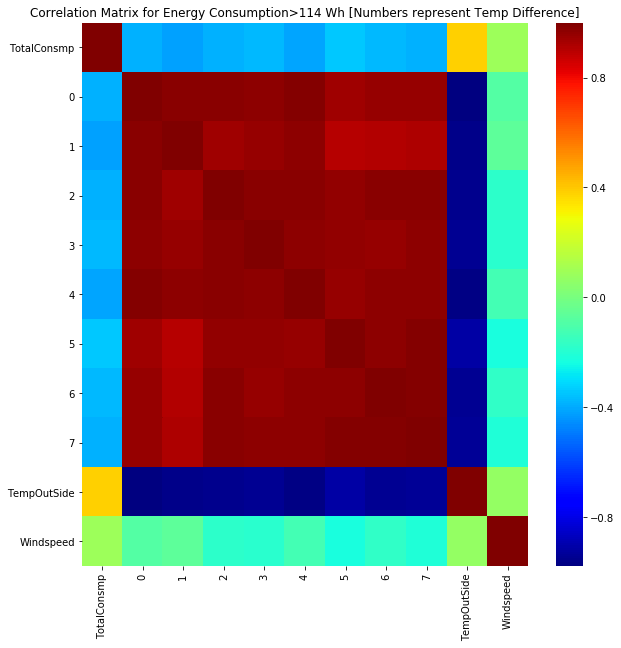

In [760]:
### Feature Correlation Matrix for cases when Daily Energy Consumption>  114 Wh (75 th percentile)###
import seaborn as sns
fig = plt.figure(figsize=(10,10))
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
sns.heatmap(RDiff_Daily.where(Energy_Data_Daily.TotalConsmp>118).corr(),cmap="jet") 
plt.title('Correlation Matrix for Energy Consumption>114 Wh [Numbers represent Temp Difference]')

In [761]:
#np.corrcoef(Energy_Data_Daily.Windspeed.where(Energy_Data_Daily.TotalConsmp<118),Energy_Data_Daily.TotalConsmp.where(Energy_Data_Daily.TotalConsmp<118))


## MODELING AND FEATURE SELECTION ####

#### Feature Selection ####

-After correlation analysis, I found that the "OutsideAirTemp" and "WindSPeed" are the independent potential predictors
-Only "OutsideAirTemp" is being used for the daily-Total Energy Consumption here as it has higher association for especially Higher Energy Consumption Events



#### Model Selection ####
-The distribution of Energy Consumption has a reasonable Skewed normal distribution at daily timescales (the tail further shrinks for larger averaging), which can be well represented by the gaussian processes 
-The variability of Energy Consumption different scales (hourly/daily/...) requires process-based algorithms, where one could automate the tasks
-Events with less-potential predictors should account for the uncertainties in the modeling process

-Keeping the simple implementation and Above reasons, I have chosen "GAUSSIAN PROCESS REGRESSIOIN"
*** However one-should verify the accuracy using other algorithms ***
*** Which I couldn't do due to time-constraints ***




In [762]:
import requests 
from StringIO import StringIO
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
from __future__ import division
import matplotlib

import sklearn.decomposition
import sklearn.metrics
from sklearn import gaussian_process
from sklearn import cross_validation

#pd.options.display.mpl_style = 'default'

In [763]:
DailyEnergyWithFeatures=pd.DataFrame(Energy_Data_Daily,columns=["TotalConsmp",'TempOutSide','Windspeed'])


In [764]:
def addDailyTimeFeatures(df):
    df['weekday'] = df.index.weekday
    df['day'] = df.index.dayofyear
    df['week'] = df.index.weekofyear
    return df

In [765]:
dailyElectricityWithFeatures = addDailyTimeFeatures(DailyEnergyWithFeatures)
dailyElectricityWithFeatures.head()

,TotalConsmp,TempOutSide,Windspeed,weekday,day,week
date,,,,,,
2016-01-11,166.666667,5.922619,6.083333,0,11,2
2016-01-12,89.930556,5.566319,5.784722,1,12,2
2016-01-13,102.430556,4.856944,5.614583,2,13,2
2016-01-14,156.388889,3.431944,6.277778,3,14,2
2016-01-15,131.319444,2.665276,7.770833,4,15,2


In [766]:
#df = dailyElectricityWithFeatures[['weekday', 'day', 'week', 'TempOutSide', 'Windspeed', 'TotalConsmp']]
df = dailyElectricityWithFeatures[['weekday', 'day', 'week', 'TempOutSide', 'TotalConsmp']]

trainSet=df['2016-01-11':'2016-04-27']
testSet_dailyElectricity=df['2016-04-28':'2016-05-27']

trainX_dailyElectricity = trainSet.values[:,0:-1]
trainY_dailyElectricity = trainSet.values[:,4]

testX_dailyElectricity = testSet_dailyElectricity.values[:,0:-1]
testY_dailyElectricity = testSet_dailyElectricity.values[:,4]

/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.p

/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function squared_exponential is deprecated; The function squared_exponential of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation

/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function squared_exponential is deprecated; The function squared_exponential of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: Depreca

/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function squared_exponential is deprecated; The function squared_exponential of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn

/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function squared_exponential is deprecated; The function squared_exponential of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation

/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function squared_exponential is deprecated; The function squared_exponential of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation

/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function squared_exponential is deprecated; The function squared_exponential of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: Depreca

/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function squared_exponential is deprecated; The function squared_exponential of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn

/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function squared_exponential is deprecated; The function squared_exponential of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation

/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function squared_exponential is deprecated; The function squared_exponential of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation

/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function squared_exponential is deprecated; The function squared_exponential of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation

/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function squared_exponential is deprecated; The function squared_exponential of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: Depreca

/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function squared_exponential is deprecated; The function squared_exponential of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: Depreca

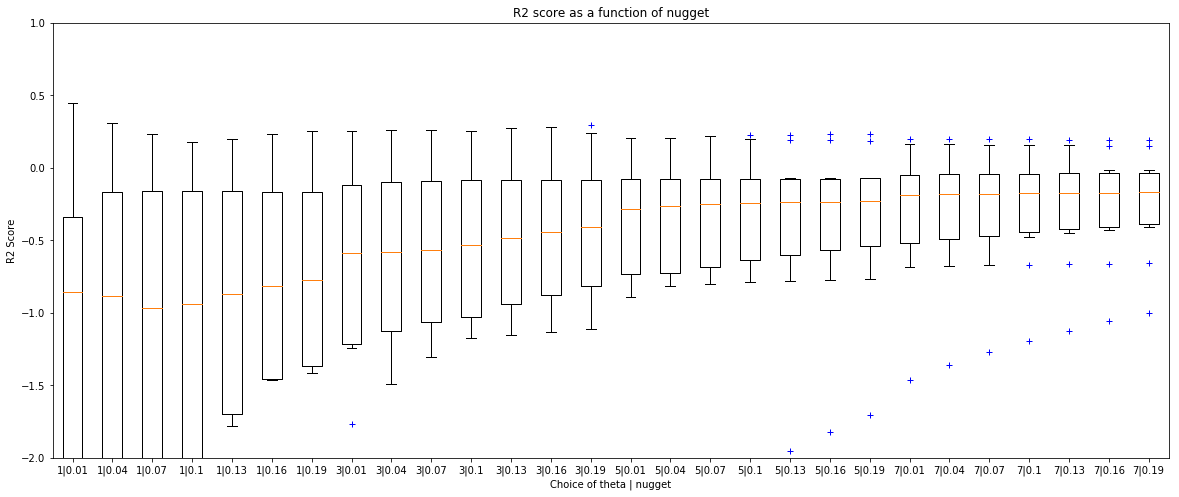

In [767]:
def crossValidation_all(theta, nugget, nfold, trainX, trainY):
    
    thetaU = theta * 2
    thetaL = theta/2
    
    scores = np.zeros((len(nugget) * len(theta), nfold))
    labels = ["" for x in range(len(nugget) * len(theta))]

    k = 0
    for j in range(len(theta)):
        for i in range(len(nugget)):
            gp = gaussian_process.GaussianProcess(theta0 = theta[j], nugget = nugget[i])
            scores[k, :] = cross_validation.cross_val_score(gp, trainX, trainY, scoring='r2', cv = nfold)  
            labels[k] = str(theta[j]) + '|' + str(nugget[i])  
            k = k + 1
    
    plt.figure(figsize=(20,8))
    plt.boxplot(scores.T, sym='b+', labels = labels, whis = 0.5)
    plt.ylim([-2,1])
    plt.title('R2 score as a function of nugget')
    plt.ylabel('R2 Score')
    plt.xlabel('Choice of theta | nugget')
    plt.show()
    
    
theta = np.arange(1, 8, 2)
nfold = 10
nugget = np.arange(0.01, 0.2, 0.03)

crossValidation_all(theta, nugget, nfold, trainX_dailyElectricity, trainY_dailyElectricity)

In [768]:
##### Selected Parameters #####
#### Choosing the theta and nugget values in the Range R2 scores are reasonable
theta=1
nugget=0.13

/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/megatropics/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationW

Train score R2: 0.845731166405
Test score R2: 0.0645338831273


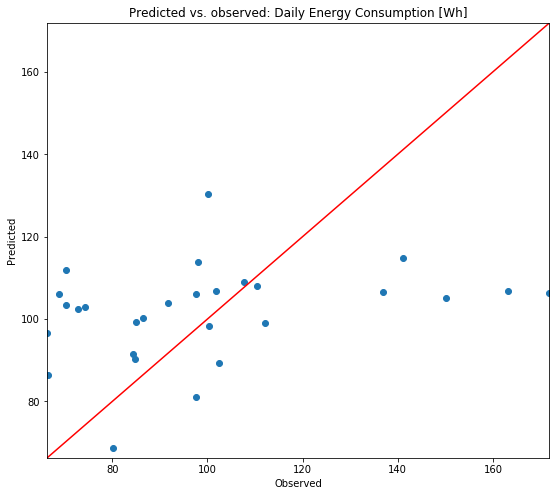

In [769]:
#### PREDICTIONS ####

def predictAll(theta, nugget, trainX, trainY, testX, testY, testSet, title):

    gp = gaussian_process.GaussianProcess(theta0=theta, nugget =nugget)
    gp.fit(trainX, trainY)

    predictedY, MSE = gp.predict(testX, eval_MSE = True)
    sigma = np.sqrt(MSE)

    results = testSet.copy()
    results['predictedY'] = predictedY
    results['sigma'] = sigma

    print "Train score R2:", gp.score(trainX, trainY)
    print "Test score R2:", sklearn.metrics.r2_score(testY, predictedY)

    plt.figure(figsize = (9,8))
    plt.scatter(testY, predictedY)
    plt.plot([min(testY), max(testY)], [min(testY), max(testY)], 'r')
    plt.xlim([min(testY), max(testY)])
    plt.ylim([min(testY), max(testY)])
    plt.title('Predicted vs. observed: ' + title)
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.show()
    
    return gp, results

gp_dailyElectricity, results_dailyElectricity = predictAll(1, 0.07, trainX_dailyElectricity, trainY_dailyElectricity, testX_dailyElectricity, testY_dailyElectricity, testSet_dailyElectricity, 'Daily Energy Consumption [Wh]')

In [770]:
subset = results_dailyElectricity['2016-04-29':'2016-05-26']
testY = subset['TotalConsmp']
predictedY = subset['predictedY']
sigma = subset['sigma']
x = range(len(testY))
print [x, x[::-1]] #0:27 and 27:0

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], [27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]]


In [771]:
np.concatenate([predictedY - 1.9600 * sigma, (predictedY + 1.9600 * sigma)[::-1]])

array([  21.69038966,   57.1706753 ,   23.5406937 ,  -46.17768997,
        -47.55544137,  -20.11824612,   -4.03756211,  -19.48127013,
        -22.36334439,  -22.38357261,  -24.7165603 ,  -31.6172429 ,
        -25.57723482,  -25.60765282,  -22.0200794 ,   12.54134085,
        -13.27546819,  -36.52474976,  -40.27718069,  -34.30265059,
        -20.39572826,  -14.6029038 ,  -21.86313721,  -20.45364859,
        -29.03994499,  -29.68257694,  -27.39419195,  -23.20876348,
        233.49631186,  227.95670423,  226.3135002 ,  227.63098852,
        236.63634631,  235.36882135,  238.53548762,  227.31817598,
        217.15967967,  213.23555632,  215.36808693,  231.04770602,
        248.18123737,  234.50644669,  230.29381633,  231.36969441,
        224.676468  ,  232.42457485,  234.65468813,  234.47882894,
        233.12537397,  184.71753542,  157.74198438,  148.67197947,
        165.68664328,  204.18709173,  172.45661704,  176.2371453 ])

## RESULTS ##

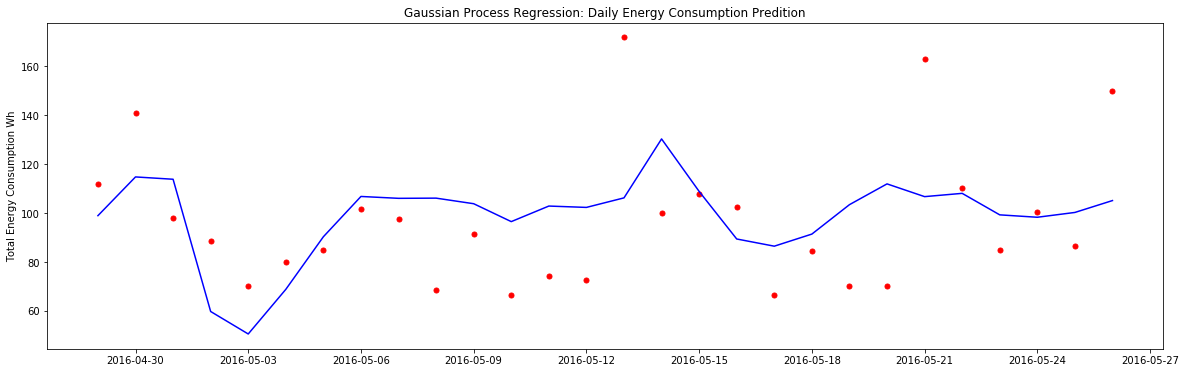

In [772]:
#### Plotting OBSERVED and PREDICTED total energy consumption ####
fig = plt.figure(figsize = (20,6))
plt.plot(testY, 'r.', markersize=10, label=u'Observations')
plt.plot(predictedY, 'b-', label=u'Prediction')
plt.title('Gaussian Process Regression: Daily Energy Consumption Predition')
plt.ylabel('Total Energy Consumption Wh')
fig.savefig('Predicted_Energy_Usage.png')

In [773]:
'''def plotGP(testY, predictedY, sigma):
    fig = plt.figure(figsize = (20,6))
    plt.plot(testY, 'r.', markersize=10, label=u'Observations')
    plt.plot(predictedY, 'b-', label=u'Prediction')
    x = range(len(testY))
    plt.fill(np.concatenate([x, x[::-1]]), np.concatenate([predictedY - 1.9600 * sigma, (predictedY + 1.9600 * sigma)[::-1]]),alpha=.5, fc='b', ec='None', label='95% confidence interval')
    
subset = results_dailyElectricity['2016-04-29':'2016-05-26']
testY = subset['TotalConsmp']
predictedY = subset['predictedY']
sigma = subset['sigma']

plotGP(testY, predictedY, sigma)
plt.ylabel('Total Energy Consumption (Wh)', fontsize = 13)
plt.title('Gaussian Process Regression: Daily Energy Consumption Prediction', fontsize = 17)
plt.legend(loc='upper right')
plt.xlim([0, len(testY)])
plt.ylim([-100,300])

xTickLabels = pd.DataFrame(data = subset.index[np.arange(0,len(subset.index),10)], columns=['datetime'])
xTickLabels['date'] = xTickLabels['datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))
ax = plt.gca()
ax.set_xticks(np.arange(0, len(subset), 10))
ax.set_xticklabels(labels = xTickLabels['date'], fontsize = 13, rotation = 90)
plt.show()'''

"def plotGP(testY, predictedY, sigma):\n    fig = plt.figure(figsize = (20,6))\n    plt.plot(testY, 'r.', markersize=10, label=u'Observations')\n    plt.plot(predictedY, 'b-', label=u'Prediction')\n    x = range(len(testY))\n    plt.fill(np.concatenate([x, x[::-1]]), np.concatenate([predictedY - 1.9600 * sigma, (predictedY + 1.9600 * sigma)[::-1]]),alpha=.5, fc='b', ec='None', label='95% confidence interval')\n    \nsubset = results_dailyElectricity['2016-04-29':'2016-05-26']\ntestY = subset['TotalConsmp']\npredictedY = subset['predictedY']\nsigma = subset['sigma']\n\nplotGP(testY, predictedY, sigma)\nplt.ylabel('Total Energy Consumption (Wh)', fontsize = 13)\nplt.title('Gaussian Process Regression: Daily Energy Consumption Prediction', fontsize = 17)\nplt.legend(loc='upper right')\nplt.xlim([0, len(testY)])\nplt.ylim([-100,300])\n\nxTickLabels = pd.DataFrame(data = subset.index[np.arange(0,len(subset.index),10)], columns=['datetime'])\nxTickLabels['date'] = xTickLabels['datetime'].app